In [157]:
import pandas
import json
import sqlite3
import warnings


In [2]:
# JSON file 
dataFile = (open('./dataFiles.json', "r")).read()
# Reading from file 
data = json.loads(dataFile) 
civ_data = pandas.read_json(json.dumps(data['civ']))
map_data = pandas.read_json(json.dumps(data['map_type']))

In [3]:
con = sqlite3.connect("database/pythonsqlite.db")
matchData = pandas.read_sql_query("""select *, 
                                pd.name as player_name, 
                                md.name as match_name from matchData md 
                                join playerData pd 
                                on pd.match_uuid = md.match_uuid 
                                and ranked = 1
                                and num_players = 2
                                and version = '40874'
                              """, con)
print(len(matchData))
matchData.head(3)

965110


,match_id,lobby_id,match_uuid,version,name,num_players,num_slots,average_rating,cheats,full_tech_tree,...,wins,streak,drops,color,team,civ,won,match_uuid,player_name,match_name
0,40007689,None,976d0590-878c-684e-9b2c-052e5dfdf959,40874,AUTOMATCH,2,2,NaN,0.0,0.0,...,None,None,None,2.0,1,7,0.0,976d0590-878c-684e-9b2c-052e5dfdf959,Mmk™,AUTOMATCH
1,40007689,None,976d0590-878c-684e-9b2c-052e5dfdf959,40874,AUTOMATCH,2,2,NaN,0.0,0.0,...,None,None,None,7.0,2,31,1.0,976d0590-878c-684e-9b2c-052e5dfdf959,Fake Noob,AUTOMATCH
2,40007682,None,bbc17757-2cca-e441-a396-9aa41469b759,40874,AUTOMATCH,2,2,NaN,0.0,0.0,...,None,None,None,2.0,1,5,0.0,bbc17757-2cca-e441-a396-9aa41469b759,Kosmic Ironside,AUTOMATCH


In [4]:
matchData.civ = matchData.civ.astype(int)
civ_data.id = civ_data.id.astype(int)
civ_data = civ_data.rename(columns={"string": "civ_name"})
matchData.map_type = matchData.map_type.astype(int)
map_data.id = map_data.id.astype(int)
map_data = map_data.rename(columns={"string": "map_name"})

join = pandas.merge(matchData.dropna(subset=['civ', 'map_type']), civ_data, left_on='civ', right_on='id', how='left')
print('join columns', join.columns)
join = pandas.merge(join, map_data, left_on='map_type', right_on='id', how='left')
#join.sort_values(by=['match_id'])
join = join.sample(frac=1).reset_index(drop=True)

join

join columns Index(['match_id', 'lobby_id', 'match_uuid', 'version', 'name', 'num_players',
       'num_slots', 'average_rating', 'cheats', 'full_tech_tree', 'ending_age',
       'expansion', 'game_type', 'has_custom_content', 'has_password',
       'lock_speed', 'lock_teams', 'map_size', 'map_type', 'pop', 'ranked',
       'leaderboard_id', 'rating_type', 'resources', 'rms', 'scenario',
       'server', 'shared_exploration', 'speed', 'starting_age',
       'team_together', 'team_positions', 'treaty_length', 'turbo', 'victory',
       'victory_time', 'visibility', 'opened', 'started', 'finished',
       'player_match_id', 'profile_id', 'steam_id', 'name', 'clan', 'country',
       'slot', 'slot_type', 'rating', 'rating_change', 'games', 'wins',
       'streak', 'drops', 'color', 'team', 'civ', 'won', 'match_uuid',
       'player_name', 'match_name', 'id', 'civ_name'],
      dtype='object')


,match_id,lobby_id,match_uuid,version,name,num_players,num_slots,average_rating,cheats,full_tech_tree,...,team,civ,won,match_uuid,player_name,match_name,id_x,civ_name,id_y,map_name
0,42153809,None,3f5dcb33-198b-764a-802f-12c4109058c0,40874,AUTOMATCH,2,2,NaN,0.0,0.0,...,2,24,0.0,3f5dcb33-198b-764a-802f-12c4109058c0,kelar,AUTOMATCH,24,Mayans,9,Arabia
1,43643755,None,552a53f9-5acc-7342-b119-e08ef39abf81,40874,AUTOMATCH,2,2,NaN,0.0,0.0,...,2,29,0.0,552a53f9-5acc-7342-b119-e08ef39abf81,root,AUTOMATCH,29,Sicilians,87,Socotra
2,43258143,None,db2d9e23-391f-9341-8036-798ea020e6b6,40874,AUTOMATCH,2,2,NaN,0.0,0.0,...,1,19,1.0,db2d9e23-391f-9341-8036-798ea020e6b6,PabloRebo,AUTOMATCH,19,Koreans,16,Fortress
3,41132021,None,c8ba6aa2-6976-6d46-ba0c-1c48ffdde494,40874,AUTOMATCH,2,2,NaN,0.0,0.0,...,1,1,1.0,c8ba6aa2-6976-6d46-ba0c-1c48ffdde494,smolmonkey1,AUTOMATCH,1,Berbers,9,Arabia
4,42518806,None,c6c5ae81-726a-ca4b-a738-c236b75cf281,40874,AUTOMATCH,2,2,NaN,0.0,0.0,...,1,4,1.0,c6c5ae81-726a-ca4b-a738-c236b75cf281,约翰斯·霍普金斯,AUTOMATCH,4,Burgundians,17,Gold Rush
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965105,42242545,None,162ac37b-d560-5a47-8dc8-b0e9dd7192b3,40874,AUTOMATCH,2,2,NaN,0.0,0.0,...,2,10,0.0,162ac37b-d560-5a47-8dc8-b0e9dd7192b3,自古多情空餘恨,AUTOMATCH,10,Ethiopians,29,Arena
965106,40410595,None,db5333c2-5ee0-3540-8538-51810f74b932,40874,AUTOMATCH,2,2,NaN,0.0,0.0,...,2,17,1.0,db5333c2-5ee0-3540-8538-51810f74b932,slycayer,AUTOMATCH,17,Japanese,9,Arabia
965107,42402156,None,e909baa3-eaf8-6444-bbf0-2adf8dbc8020,40874,AUTOMATCH,2,2,NaN,0.0,0.0,...,1,27,1.0,e909baa3-eaf8-6444-bbf0-2adf8dbc8020,Ornitorrinco,AUTOMATCH,27,Portuguese,9,Arabia
965108,44029564,109775240937445412,b9a208f1-c5fe-444b-beec-3a33a943c333,40874,AUTOMATCH,2,2,1160.0,0.0,0.0,...,1,26,NaN,b9a208f1-c5fe-444b-beec-3a33a943c333,xPetro22x,AUTOMATCH,26,Persians,9,Arabia


In [5]:
join.columns

Index(['match_id', 'lobby_id', 'match_uuid', 'version', 'name', 'num_players',
       'num_slots', 'average_rating', 'cheats', 'full_tech_tree', 'ending_age',
       'expansion', 'game_type', 'has_custom_content', 'has_password',
       'lock_speed', 'lock_teams', 'map_size', 'map_type', 'pop', 'ranked',
       'leaderboard_id', 'rating_type', 'resources', 'rms', 'scenario',
       'server', 'shared_exploration', 'speed', 'starting_age',
       'team_together', 'team_positions', 'treaty_length', 'turbo', 'victory',
       'victory_time', 'visibility', 'opened', 'started', 'finished',
       'player_match_id', 'profile_id', 'steam_id', 'name', 'clan', 'country',
       'slot', 'slot_type', 'rating', 'rating_change', 'games', 'wins',
       'streak', 'drops', 'color', 'team', 'civ', 'won', 'match_uuid',
       'player_name', 'match_name', 'id_x', 'civ_name', 'id_y', 'map_name'],
      dtype='object')

In [153]:
players_data = join.loc[join['rating'] > 1500]
player_ids_over_elo = players_data.profile_id.unique()
gamesOverElo = join.loc[join['profile_id'].isin(player_ids_over_elo)]
civs = gamesOverElo.civ_name.unique()
civ_median_columns = ['civ', 'win_rate', 'medians']
player_columns=['player_id', 'player_name', 'max_rating', 'win_rate', 'games_played', 'civ']

civ_median_data = pandas.DataFrame(columns=civ_median_columns)
allPlayerDataFrameMerged = pandas.DataFrame(columns=player_columns)
for civ in civs:
    civ_games = gamesOverElo.loc[gamesOverElo['civ_name'] == civ]
    [civ_wins,civ_losses] = civ_games['won'].value_counts().reindex([1,0], fill_value=0).values
    players = civ_games.profile_id.unique()
    mean_win_rate = civ_wins/(civ_wins+civ_losses)
    print(civ.upper(), mean_win_rate)
    allPlayerDataFrame = pandas.DataFrame(columns=player_columns)
    for player_id in players:
        player_civ_games = civ_games[civ_games['profile_id'] == player_id]
        max_rating = players_data.loc[players_data['profile_id'] == player_id].rating.max()
        player_name = player_civ_games.player_name.max()
        [wins,losses] = player_civ_games['won'].value_counts().reindex([1,0], fill_value=0).values
        if(wins > 2 and losses > 2):
            [wins,losses] = player_civ_games['won'].value_counts().reindex([1,0], fill_value=0).values
            win_rate = wins/(wins+losses)
            games_played = wins+losses
            player_data = [[player_id, player_name, max_rating, win_rate, games_played, civ]]
            #print('data', data)
            allPlayerDataFrame = allPlayerDataFrame.append(pandas.DataFrame(player_data, columns=player_columns))
    #print('allPlayerDataFrame', allPlayerDataFrame)
    quantiles = allPlayerDataFrame.win_rate.quantile([0.1,0.25,0.5,0.75,0.9])
    allPlayerDataFrameMerged = allPlayerDataFrameMerged.append(allPlayerDataFrame)
    civ_median_data_row = [[civ.upper(), mean_win_rate, quantiles]]
    civ_median_data = civ_median_data.append(pandas.DataFrame(civ_median_data_row, columns=civ_median_columns))
print(civ_median_data)

MAYANS 0.5106032906764169
MAGYARS 0.47158403869407495
TURKS 0.5325084910237748
ETHIOPIANS 0.5764722496822483
CHINESE 0.512972972972973
BURMESE 0.5034228541337546
KHMER 0.41566690190543404
FRANKS 0.5945218879921741
AZTECS 0.5515891654924064
BRITONS 0.5207620908646801
SARACENS 0.5214312336936265
KOREANS 0.5243600330305532
ITALIANS 0.5314685314685315
GOTHS 0.56994708994709
CELTS 0.5060329967988181
SPANISH 0.5598023064250411
MALIANS 0.5581863979848867
CUMANS 0.5082781456953642
JAPANESE 0.5307142857142857
SICILIANS 0.514823717948718
MONGOLS 0.5079775765416128
HUNS 0.5565484501535883
TATARS 0.48586266589728794
BERBERS 0.5490541135063792
BYZANTINES 0.5644811970860406
TEUTONS 0.47985537190082644
BULGARIANS 0.4644578313253012
PERSIANS 0.4728148657949071
INCAS 0.5259067357512953
SLAVS 0.481266149870801
BURGUNDIANS 0.5464135021097046
MALAY 0.5347022587268994
INDIANS 0.4714611872146119
LITHUANIANS 0.5108391608391608
PORTUGUESE 0.49278152069297404
           civ  win_rate                           

<AxesSubplot:xlabel='win_rate', ylabel='civ'>

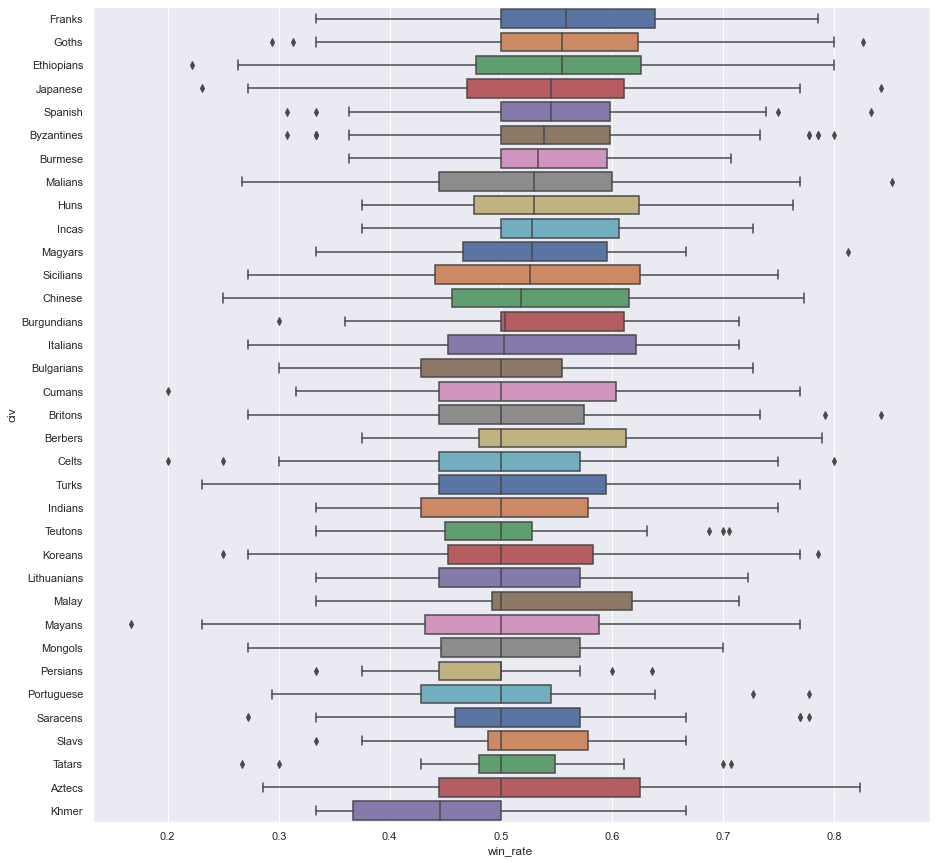

In [170]:
warnings.filterwarnings('ignore')
sns.set_style("whitegrid") 
sns.set(rc={'figure.figsize':(15,15)})
civ_order = allPlayerDataFrameMerged.groupby(by=["civ"])["win_rate"].median().sort_values(ascending=True).iloc[::-1].index
plt = sns.boxplot(y = 'civ', x = 'win_rate', data = allPlayerDataFrameMerged, order=civ_order, linewidth=1.5, palette=sns.color_palette()) 
#plt = sns.swarmplot(y = 'civ', x = 'win_rate', data = allPlayerDataFrameMerged, order=civ_order, linewidth=1.5, palette=sns.color_palette()) 
#plt.set_xticklabels(plt.get_xticklabels(),rotation=30)
plt